# Random Variables

A **random variable**, X,  is a variable quantity (i.e., not necessarily fixed) whose possible values depend on a set of random events. Like a traditional mathematical variable, its value is unknown a priori (before the outcome of the events is known)
A random variable's possible values might represent the possible outcomes of a yet to occur event. This event  can take on a range of values, each with an associated probability, giving the random variable a probability distribution


For example, the value of a roll of a die is a random variable. This variable,X, can take values 1 - 6, each with a probability of ⅙, but it’s exact value is unknown till the die roll is actually performed.

A **probability distribution** is a mathematical function that assigns a probability to every possible value of a random variable.
For example, the random variable X that represents the value of a die rolls and can take values 1 to 6, each with a probability of ⅙ has a distribution: $P(X=i) = 1/6$, where i = 1,2,3,4,5,6

Random variables can be separated into two different classes:
 - Discrete random variables
 - Continuous random variables

### Discrete Random Variables

Discrete Random Variable have finitely countable outcomes. For example, the value of a coin toss can only be H or T, each with a probability of $1/2$. Similarly the value of a die roll can only be between 1 and 6

For discrete random variables where X can take a finite set of values, the probability distribution function,  gives the probability $p(x)$ that X is exactly equal to some value.
$p(x) = P(X=x)$, where x belongs to the finite set of values that are possible

A probability distribution function has two main properties:
1. $0 \leq p(x) \leq 1$ because all probabilities are in the interval $[0, 1]$
2. The sum of all probabilities $p(x)$ over all values of X is equal to $1$. The total weights for all values of the random variable must add to $1$.

## Uniform Distribution

Let's look at the distribution of a die roll below. 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from auquanToolbox import dataloader as dl
from __future__ import division

In [2]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples

A die roll can have 6 values, each value can occur with a probability of $1/6$. Each time we roll the die, we have an equal chance of getting each face. This is an example of uniform distribution. The chart below shows distribution for 10 die rolls.

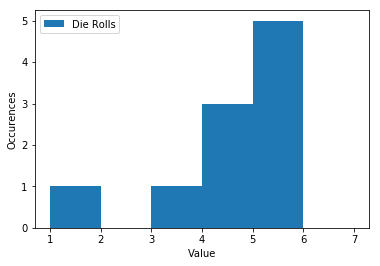

In [3]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.hist(DieRolls.draw(10), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls'])
plt.show()

In the short run this looks uneven, but if we take a large number of samples it is apparent that each face is occurring the same percentage of times. The chart below shows distribution for 10,000 die rolls

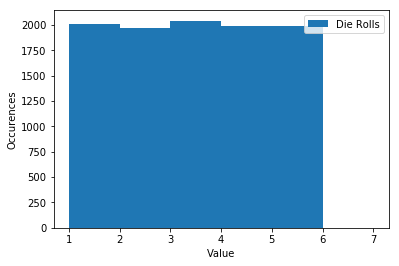

In [4]:
plt.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);
plt.show()

A random variable is **independent and identically distributed** *(i.i.d)* if each random variable has the same probability distribution as the others and all are mutually independent, i.e. outcome of one doesn’t affect the other. For example, random variables representing die rolls are i.i.d. The value of one die roll does not affect the value of next die roll.

## Binomial Distribution

A binomial distribution is used to describe successes and failures in a binary experiment. This can be very useful in an investment context as many of our choices tend to be binary like this. A single experiment which can result in success with probability p and failure with probability (1-p) is called a Bernoulli trial.

$$p(1) = P(X = 1) = p \ \ \ \ \ \ \\
p(0) = P(X = 0) = 1-p$$

A binomial distribution is a set of $n$ Bernoulli trials. There can be between $0$ and $n$ successes in $n$ trials, with each trial having the same probability of success, $p$, and all of the trials being independent of each other. A binomial random variable is denoted as $X$ **~** $B(n, p)$. 

The probability function of a binomial random variable $p(x)$ is the probability that there are exactly $x$ sucesses in $n$ trials. This is defined by choosing $x$ trials which should result in success and multiplying by the probability that these $x$ trails result in success and the remaining $n - x$ trials result in failure. The resulting probability function is:

$$
p(x) = P(X = x) = \binom{n}{x}p^x(1-p)^{n-x} = \frac{n!}{(n-x)! \ x!} p^x(1-p)^{n-x}
$$

If $X$ is a binomial random variable distributed with $B(n, p)$.

In [5]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

Let's draw the distribution of 10000 samples of a binomial random variable $B(5, 0.5)$, i.e 5 trials with 50% probability of success.

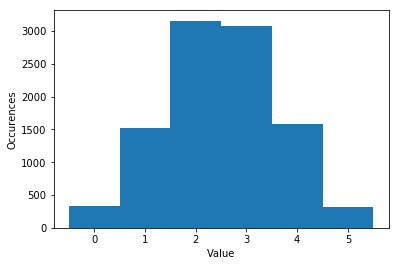

In [9]:
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');
plt.show()

We see that the dsitribution is symmetric, since probability of success = probability of failure. If we skew the probabilities such that probability of success is 0.25, we get an asymmetric distribution.

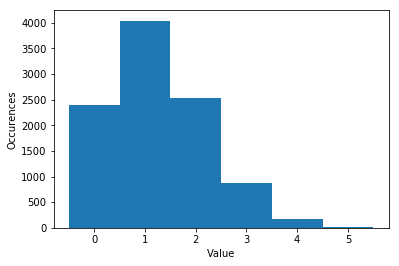

In [10]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');
plt.show()

We can extend this idea of an experiment following a binomial random variable into a framework that we call the **Binomial Model of Stock Price Movement**. This is used as one of the foundations for option pricing. In the Binomial Model, it is assumed that for any given time period a stock price can move up or down by a value determined by the up or down probabilities. This turns the stock price into the function of a binomial random variable, the magnitude of upward or downward movement, and the initial stock price. We can vary these parameters in order to approximate different stock price distributions.

## Continuous Random Variables

For continuous random variables (where X can take an infinite number of values over a continuous range), the probability of a single point, the probability that X is exactly equal to some value is zero. In this case, the probability distribution function,  gives the probability over intervals which can include infinitely many outcomes. Here we define a **probability density function** (PDF), $f(x)$, such that we can say:
$$P(a < X < b) = \int_a^b f(x)dx$$

For example, if you buy a piece of rope and the scale reads 1 meter, this value is possible but the probability that the length is exactly 1 meter is zero; You can keep increasing the accuracy of your instrument so that the probability of measuring exactly 1m tends to zero. However, we might be able to say that there is 99% probability that the length is between 99cm and 1.01 m. 
Just like a probability distribution function $f(x)$ gives the probability that a random variable lies in a range, a  cumulative distribution function $F(x)$ describes the probability that a random variable is less than or equal to a given value.
$$F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) dt $$


In [12]:
class ContinuousRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

The most widely used distribution with widespread applications in finance is the normal distribution.

# Normal Distribution

Many important tests and methods in statistics, and by extension, finance, are based on the assumption of normality. A large part of this is due to the results of the Central Limit Theorem (CLT) which states that the sum of many independent random variables tends toward a normal distribution, even if the original variables themselves are not normally distributed. The convenience of the normal distribution finds its way into certain algorithmic trading strategies as well. 

In [13]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean = 0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        return
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

Normal distributions are described by their mean ($\mu$) and variance ($\sigma^2$, where $\sigma$ is the standard deviation). The probability density of the normal distribution is:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

And is defined for $-\infty < x < \infty$. When we have $\mu = 0$ and $\sigma = 1$, we call this the standard normal distribution.

By changing the mean and standard deviation of the normal distribution, we can change the depth and width of the bell curve. With a larger standard deviation, the values of the distribution are less concentrated around the mean.

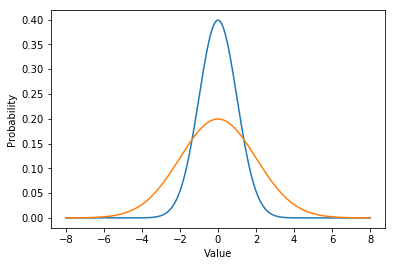

In [15]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 200)
y = (1/(sigma_1 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_1)*(x - mu_1) / (2 * sigma_1 * sigma_1))
z = (1/(sigma_2 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_2)*(x - mu_2) / (2 * sigma_2 * sigma_2))
plt.plot(x, y, x, z)
plt.xlabel('Value')
plt.ylabel('Probability');
plt.show()

In modern portfolio theory, stock returns are generally assumed to follow a normal distribution. We use the distribution to model returns instead of stock prices because prices cannot go below $0$ while the normal distribution can take on all values on the real line, making it better suited to returns.  

One major characteristic of a normal random variable is that a linear combination of two or more normal random variables is another normal random variable. This is useful for considering mean returns and variance of a portfolio of multiple stocks.

## 68-95-99.7 rule or 3 sigma rule

This rule of thumb states that given the mean and variance of a normal distribution, we can make the following statements:

* Around $68\%$ of all observations fall within one standard deviations around the mean ($\mu \pm \sigma$)
* Around $95\%$ of all observations fall within two standard deviations around the mean ($\mu \pm 2\sigma$)
* Around $99\%$ of all observations fall within three standard deviations aroud the mean ($\mu \pm 3\sigma$)

## Standardzing Random Variables to Normal Distribution

**The power of normal dsitributions lies in the fact that using the central limit theorem, we can standardize different random variables so that they become normal random variables** 

We standardize a random variable $X$ by subtracting the mean and dividing by the variance, resulting in the standard normal random variable $Z$.

$$
Z = \frac{X - \mu}{\sigma}
$$

Let's look at the case where $X$ **~** $B(n, p)$ is a binomial random variable. In the case of a binomial random variable, the mean is $\mu = np$ and the variance is $\sigma^2 = np(1 - p)$.

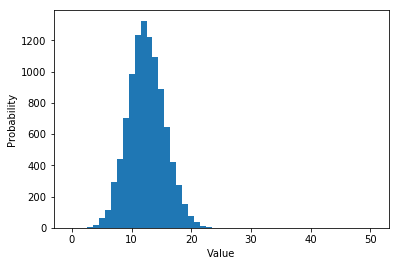

In [16]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p) / np.sqrt(n * p * (1 - p))

plt.hist(X_samples, bins = range(0, n + 2), align = 'left')
plt.xlabel('Value')
plt.ylabel('Probability');
plt.show()

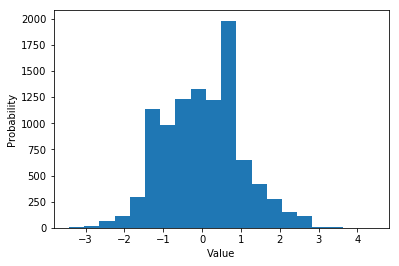

In [17]:
plt.hist(Z_samples, bins=20)
plt.xlabel('Value')
plt.ylabel('Probability');
plt.show()

The idea that we can standardize random variables is very important. By changing a random variable to a distribution that we are more familiar with, the standard normal distribution, we can easily answer any probability questions that we have about the original variable. This is dependent, however, on having a large enough sample size.

## Stock Returns as Normal Distribution

Let's assume that stock returns are normally distributed. Say that $Y$ is the price of a stock. We will simulate its returns and plot it.

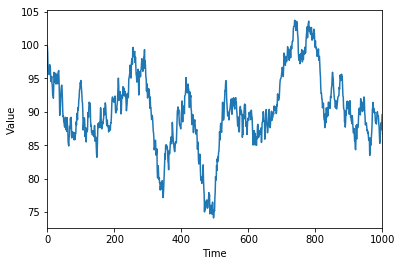

In [27]:
Y_initial = 100
X = NormalRandomVariable(0, 1)
Y_returns = X.draw(1000) # generate 1000 daily returns
Y = pd.Series(np.cumsum(Y_returns), name = 'Y') + Y_initial
Y.plot()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Say that we have some other stock, $Z$, and that we have a portfolio of $Y$ and $Z$, called $W$.

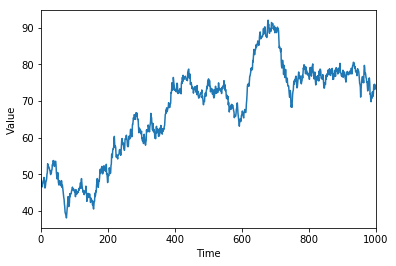

In [28]:
Z_initial = 50
Z_returns = X.draw(1000)
Z = pd.Series(np.cumsum(Z_returns), name = 'Z') + Z_initial
Z.plot()
plt.xlabel('Time')
plt.ylabel('Value');
plt.show()

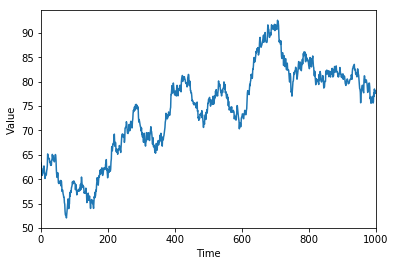

In [29]:
Y_quantity = 20
Z_quantity = 50
Y_weight = Y_quantity/(Y_quantity + Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = 'Portfolio') + W_initial
W.plot()
plt.xlabel('Time')
plt.ylabel('Value');
plt.show()

We construct $W$ by taking a weighted average of $Y$ and $Z$ based on their quantity.

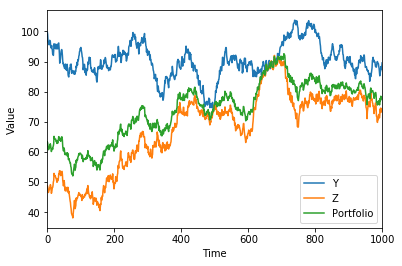

In [30]:
pd.concat([Y, Z, W], axis = 1).plot()
plt.xlabel('Time')
plt.ylabel('Value');
plt.show()

Note how the returns of our portfolio, $W$, are also normally distributed

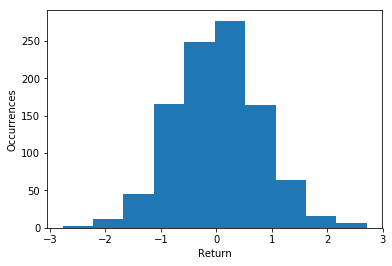

In [31]:
plt.hist(W_returns);
plt.xlabel('Return')
plt.ylabel('Occurrences');
plt.show()

## Fitting a Distribution 

Let's attempt to fit a probability distribution to the returns of a stock. We will take the returns of AAPL and try to fit a normal distribution to them. The first thing to check is whether the returns actually exhibit properties of a normal distribution. For this purpose, we will use the Jarque-Bera test, which indicates non-normality if the p-value is below a cutoff.

In [67]:
start = '2014-01-01'
end = '2016-12-31'
data = dl.load_data_nologs('nasdaq', ['AAPL'], start, end)
prices = data['ADJ CLOSE']['AAPL']


Reading AAPL


('The JB test p-value is: ', 8.6122250241313796e-22)
('We reject the hypothesis that the data are normally distributed ', True)
('The skewness of the returns is: ', 0.38138558143920764)
('The kurtosis of the returns is: ', 4.231909703399142)


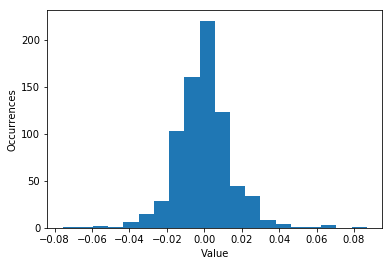

In [68]:
# Take the daily returns
returns = prices/prices.shift(-1) -1

#Set a cutoff
cutoff = 0.01

# Get the p-value of the normality test
k2, p_value = scipy.stats.mstats.normaltest(returns[:-1].values)
print("The JB test p-value is: ", p_value)
print("We reject the hypothesis that the data are normally distributed ", p_value < cutoff)
print("The skewness of the returns is: ", scipy.stats.skew(returns[:-1].values))
print("The kurtosis of the returns is: ", scipy.stats.kurtosis(returns[:-1].values))
plt.hist(returns[:-1], bins = 20)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.show()

The low p-value of the test leads us to *reject* the null hypothesis that the returns are normally distributed. This is due to the high kurtosis (normal distributions have a kurtosis of $3$).

We will proceed from here assuming that the returns are normally distributed so that we can go through the steps of fitting a distribution. We calculate the sample mean and standard deviation of the series and see how a theoretical normal curve fits against the actual values.

In [69]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns[:-1])
sample_std_dev = np.std(returns[:-1])
print("Mean: ", sample_mean)

('Mean: ', -0.0004662534806121209)


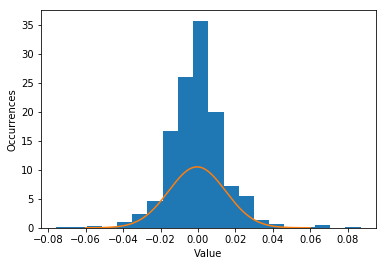

In [70]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/(sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.hist(returns[:-1], bins = 20, normed=True)
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');
plt.show()

Our theoretical curve for the returns has a substantially lower peak than the actual values, which makes sense because the returns are not actually normally distributed. This is again due to the kurtosis of the normal distribution. The returns have a kurtosis value of around $5.29$, while the kurtosis of the normal distribution is $3$. A higher kurtosis leads to a higher peak. 

A major reason why it is so difficult to model prices and returns is due to the underlying probability distributions. A lot of theories and frameworks in finance require that data be somehow related to the normal distribution. This is a major reason for why the normal distribution seems to be so prevalent. However, it is exceedingly difficult to find real-world data that fits nicely into the assumptions of normality. When actually implementing a strategy, you should not assume that data follows a distribution that it demonstrably does not unless there is a very good reason for it.

Generally, when trying to fit a probability distribution to real-world values, we should have a particular distribution (or distributions) in mind. There are a variety of tests for different distributions that we can apply to see what might be the best fit. In additon, as more information becomes available, it will become necessary to update the sample mean and standard deviation or maybe even to find a different distribution to more accurately reflect the new information. The shape of the distribution will change accordingly.